--------------------------------------------------------------------------------
# Universidade Federal de Pernambuco - UFPE

# Centro de Informática - CIn

# Curso de Especialização em Deep Learning

Disciplina: Processamento de Linguagem Natural

Professor: Luciano Barbosa

Aluno: Eduardo Rubens Gaspar (equipe de 1 aluno)

PROJETO FINAL DE PLN

Itens abordados neste trabalho:


1. Pipeline para SVM + BOW

    1.1. Lendo o arquivo do dataset

    1.2 Imprimindo cabeçario

    1.3 Listando os Produtos Disponíveis

    1.4 Escolhendo um produto pelo ID e filtrando pelo produto escolhido

    1.5 Criando Classes de Sentimento

    1.6 Problema de SettingWithCopyWarning

    1.7 Lidando com o Desbalanceamento

    1.7.1 Fazendo sobreamostragem dos dados

    1.8 Dividindo em Treino e Teste

    1.9 Vetorizando com **Bag of Words**

    1.10 Treinando o Modelo **SVM**

    1.11 Fazendo Previsões

    1.12 Avaliando o Modelo

2. Pipeline para **SVM + Embeddings**

    2.1 Baixando os vetores GloVe em: GloVe - Stanford.

    2.2 Usando o arquivo glove.6B.300d.txt (300 dimensões, vocabulário em inglês).

    2.3 Carregando os Embeddings.

3. Pipeline para **BERT**

    3.1 instalando a biblioteca transformers e o datasets.

    3.2 Carregando o Modelo Pré-Treinado e o tokenizador do BERT-base.

    3.3 Prepararando os Dados

    3.3a Tokenizando os textos e criando os tensores para entrada no BERT

    3.3b Usando o framework PyTorch

    3.4 Configurando o Otimizador e Treinador

    3.4a Utilizando otimizadores específicos para modelos pré-treinados.

    3.4.b Configurando o treinamento.

    3.5 Treinando o Modelo

    3.5a Treinando o modelo com o loop de treinamento.

    3.5b Calculando o loss médio e acurácia no final de cada época.

    3.5c Ao final do treinamento plota um gráfico para a evolução do loss e outro para evolução da acurácia.

    3.6 Avaliando o Modelo com o conjunto de teste

    3.7 Código para Plotar o Gráfico da estrutura da BERT no Notebook
    
--------------------------------------------------------------------------------



In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


---------------------------------------------------------------
# 1. Pipeline para SVM + BOW
---------------------------------------------------------------

In [ ]:
pip install scikit-learn datasets pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


1.1 Lendo o arquivo do dataset

In [ ]:
import pandas as pd

# Caminho atualizado do dataset
file_path = '/content/drive/MyDrive/NLP-Projeto-Final/Dataset/Reviews.csv'

# Carregar o dataset
df = pd.read_csv(file_path)

# Visualizar as colunas e as primeiras linhas
print("Colunas disponíveis:", df.columns)
print("Primeiras linhas do dataset:")
print(df.head())


Colunas disponíveis: Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')
Primeiras linhas do dataset:
   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4           

1.2 Imprimindo cabeçario

In [ ]:
print(df.columns)

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')


1.3 Listando os Produtos Disponíveis

In [ ]:
# Contar a quantidade de avaliações por ProductId
product_counts = df['ProductId'].value_counts()
print(product_counts)


ProductId
B007JFMH8M    913
B002QWHJOU    632
B002QWP89S    632
B0026RQTGE    632
B002QWP8H0    632
             ... 
B004CHDG44      1
B004CZUOSM      1
B009GTIHG0      1
B003IFB148      1
B002XO3Q52      1
Name: count, Length: 74258, dtype: int64


1.4 Escolhendo um produto pelo ID e filtrando pelo produto escolhido

In [ ]:
# Filtrar pelo ProductId com maior contagem
chosen_product = 'B007JFMH8M'
df_filtered = df[df['ProductId'] == chosen_product]

# Verificar o tamanho do dataset filtrado
print(f"Quantidade de avaliações para o produto {chosen_product}: {len(df_filtered)}")


Quantidade de avaliações para o produto B007JFMH8M: 913


1.5 Criando Classes de Sentimento:

- "positive"
- "neutral"
- "negative'

In [ ]:
def categorize_score(score):
    if score >= 4:
        return "positive"
    elif score == 3:
        return "neutral"
    else:
        return "negative"

df_filtered['Sentiment'] = df_filtered['Score'].apply(categorize_score)

# Verificar a distribuição das classes
print(df_filtered['Sentiment'].value_counts())


Sentiment
positive    841
neutral      56
negative     16
Name: count, dtype: int64


<ipython-input-7-713cf24b809d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Sentiment'] = df_filtered['Score'].apply(categorize_score)


1.6 Problema de SettingWithCopyWarning:

- Como Resolver o Aviso e Lidar com o Desbalanceamento
- Usando o método .loc para evitar o aviso ao adicionar ou modificar colunas

In [ ]:
df_filtered.loc[:, 'Sentiment'] = df_filtered['Score'].apply(categorize_score)


1.7 Lidando com o Desbalanceamento:

O dataset apresenta:

- 841 positivos,
- 56 neutros,
- 16 negativos apenas


Opção: Sobreamostragem
Aumentando as instâncias das classes minoritárias para equilibrar os dados:

In [ ]:
from sklearn.utils import resample

# Separar as classes
df_positive = df_filtered[df_filtered['Sentiment'] == 'positive']
df_neutral = df_filtered[df_filtered['Sentiment'] == 'neutral']
df_negative = df_filtered[df_filtered['Sentiment'] == 'negative']

# Sobreamostrar as classes neutras e negativas
df_neutral_upsampled = resample(df_neutral, replace=True, n_samples=841, random_state=42)
df_negative_upsampled = resample(df_negative, replace=True, n_samples=841, random_state=42)

# Combinar novamente em um único DataFrame
df_balanced = pd.concat([df_positive, df_neutral_upsampled, df_negative_upsampled])

# Verificar a nova distribuição
print(df_balanced['Sentiment'].value_counts())


Sentiment
positive    841
neutral     841
negative    841
Name: count, dtype: int64


1.8 Dividindo em Treino e Teste

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    df_balanced['Text'],
    df_balanced['Sentiment'],
    test_size=0.2,
    random_state=42
)

print(f"Dados de treino: {len(X_train)}")
print(f"Dados de teste: {len(X_test)}")


Dados de treino: 2018
Dados de teste: 505


1.9 Vetorizando com **Bag of Words**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Vetorização com Bag of Words
vectorizer = CountVectorizer(stop_words='english', max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print("Vetorizações concluídas!")


Vetorizações concluídas!


1.10 Treinando o Modelo **SVM**

In [ ]:
from sklearn.svm import SVC

# Inicializar e treinar o SVM
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_vec, y_train)

print("Treinamento concluído!")


Treinamento concluído!


1.11 Fazendo Previsões

In [ ]:
# Fazer previsões no conjunto de teste
y_pred = svm.predict(X_test_vec)


1.12 Avaliando o Modelo

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Relatório de classificação
print("Relatório de classificação:")
print(classification_report(y_test, y_pred))

# Matriz de confusão
print("Matriz de confusão:")
print(confusion_matrix(y_test, y_pred))


Relatório de classificação:
              precision    recall  f1-score   support

    negative       0.99      1.00      1.00       162
     neutral       0.98      1.00      0.99       179
    positive       1.00      0.97      0.98       164

    accuracy                           0.99       505
   macro avg       0.99      0.99      0.99       505
weighted avg       0.99      0.99      0.99       505

Matriz de confusão:
[[162   0   0]
 [  0 179   0]
 [  1   4 159]]


---------------------------------------------------------------
# 2. Pipeline para **SVM + Embeddings**
---------------------------------------------------------------
Obtendo Embeddings Pré-Treinados
Usaremos o **GloVe**, que estão disponíveis gratuitamente:

2.1 Baixando os vetores GloVe em: GloVe - Stanford.

2.2 Usando o arquivo glove.6B.300d.txt (300 dimensões, vocabulário em inglês).

2.3 Carregando os Embeddings

In [ ]:
# Carregar GloVe pré-treinado
import numpy as np

def load_glove_embeddings(file_path):
    embeddings = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings

# Caminho para o arquivo GloVe
glove_path = '/content/drive/MyDrive/NLP-Projeto-Final/glove.6B.300d.txt'
glove_embeddings = load_glove_embeddings(glove_path)

print(f"Número de palavras no vocabulário GloVe: {len(glove_embeddings)}")


Número de palavras no vocabulário GloVe: 400000


2.4 Criando Representações Numéricas dos Textos
Para cada texto, calcularemos a média dos vetores das palavras nele contidas:

In [ ]:
def text_to_embedding(text, embeddings, embedding_dim=300):
    words = text.split()
    word_vectors = [embeddings[word] for word in words if word in embeddings]
    if len(word_vectors) > 0:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(embedding_dim)

# Converter textos em embeddings
embedding_dim = 300
X_train_emb = np.array([text_to_embedding(text, glove_embeddings, embedding_dim) for text in X_train])
X_test_emb = np.array([text_to_embedding(text, glove_embeddings, embedding_dim) for text in X_test])

print(f"Forma dos embeddings de treino: {X_train_emb.shape}")


Forma dos embeddings de treino: (2018, 300)


2.5 Treinando o SVM com os EMBEDDINGS

In [ ]:
# Treinar SVM com embeddings
svm.fit(X_train_emb, y_train)

# Fazer previsões
y_pred = svm.predict(X_test_emb)

# Avaliar o modelo
print("Relatório de classificação:")
print(classification_report(y_test, y_pred))

print("Matriz de confusão:")
print(confusion_matrix(y_test, y_pred))


Relatório de classificação:
              precision    recall  f1-score   support

    negative       0.97      1.00      0.98       162
     neutral       0.91      0.98      0.95       179
    positive       0.98      0.87      0.92       164

    accuracy                           0.95       505
   macro avg       0.95      0.95      0.95       505
weighted avg       0.95      0.95      0.95       505

Matriz de confusão:
[[162   0   0]
 [  0 176   3]
 [  5  17 142]]


---------------------------------------------------------------
# 3. Pipeline para **BERT**
---------------------------------------------------------------

3.1 instalando a biblioteca transformers e o datasets

In [ ]:
!pip install transformers datasets


3.2 Carregando o Modelo Pré-Treinado e o tokenizador do BERT-base:

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification

# Carregar o tokenizador e o modelo
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3)

print("Modelo e tokenizador carregados!")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Modelo e tokenizador carregados!


3.3 Prepararando os Dados

3.3a Tokenizando os textos e criando os tensores para entrada no BERT

3.3b Usando o framework PyTorch

In [ ]:
from torch.utils.data import DataLoader, Dataset
import torch

# Classe para criar dataset compatível com DataLoader
class SentimentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, index):
        text = self.texts[index]
        label = self.labels[index]

        # Tokenizar o texto
        encoding = self.tokenizer.encode_plus(
            text,
            max_length=self.max_len,
            add_special_tokens=True,
            truncation=True,
            padding="max_length",
            return_tensors="pt"
        )

        return {
            "input_ids": encoding["input_ids"].squeeze(0),
            "attention_mask": encoding["attention_mask"].squeeze(0),
            "labels": torch.tensor(label, dtype=torch.long)
        }

# Preparar os dados
max_len = 128
label_map = {"positive": 0, "neutral": 1, "negative": 2}

train_dataset = SentimentDataset(
    X_train.tolist(),
    [label_map[label] for label in y_train.tolist()],
    tokenizer,
    max_len
)

test_dataset = SentimentDataset(
    X_test.tolist(),
    [label_map[label] for label in y_test.tolist()],
    tokenizer,
    max_len
)

print("Datasets preparados!")


Datasets preparados!


3.4 Configurando o Otimizador e Treinador

3.4a Utilizando otimizadores específicos para modelos pré-treinados.

3.4.b Configurando o treinamento.

In [ ]:
from transformers import AdamW
from torch.utils.data import DataLoader
from transformers import get_scheduler

# Configurar DataLoaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16)

# Otimizador
optimizer = AdamW(model.parameters(), lr=5e-5)

# Agendador de aprendizado
num_training_steps = len(train_loader) * 3  # 3 épocas
lr_scheduler = get_scheduler("linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps)

# Configurar o dispositivo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

print("Configuração do treinamento concluída!")


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Configuração do treinamento concluída!


3.5 Treinando o Modelo

3.5a Treinando o modelo com o loop de treinamento.

3.5b Calculando o loss médio e acurácia no final de cada época.

3.5c Ao final do treinamento plota um gráfico para a evolução do loss e outro para evolução da acurácia.

Época 1: 100%|██████████| 127/127 [00:16<00:00,  7.48it/s, loss=0.0111]


Época 1 concluída - Loss médio: 0.3132, Acurácia: 0.8731


Época 2: 100%|██████████| 127/127 [00:15<00:00,  8.35it/s, loss=0.00303]


Época 2 concluída - Loss médio: 0.0177, Acurácia: 0.9975


Época 3: 100%|██████████| 127/127 [00:15<00:00,  8.38it/s, loss=0.0045]


Época 3 concluída - Loss médio: 0.0053, Acurácia: 0.9995


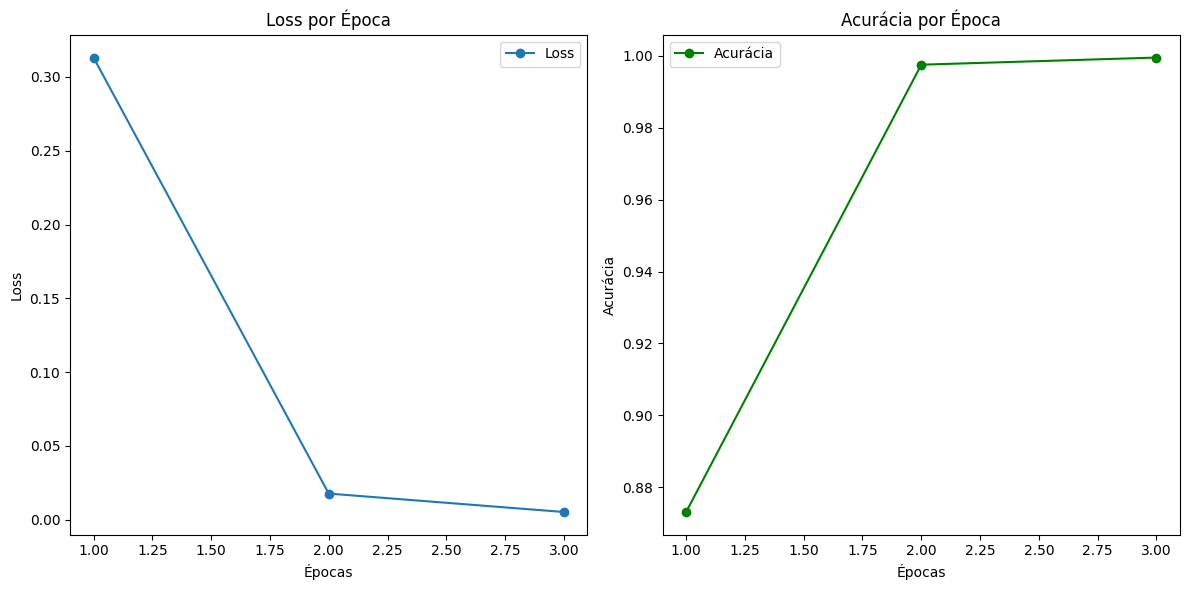

In [ ]:
import matplotlib.pyplot as plt
from tqdm import tqdm

# Inicializar listas para armazenar loss e acurácia
train_losses = []
train_accuracies = []

# Função para calcular acurácia
def calculate_accuracy(preds, labels):
    return (preds == labels).sum().item() / len(labels)

# Configurar treinamento
epochs = 3
model.train()

for epoch in range(epochs):
    epoch_loss = 0
    correct_predictions = 0
    total_samples = 0

    loop = tqdm(train_loader, leave=True)
    for batch in loop:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        # Forward pass
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        logits = outputs.logits

        # Backward pass
        loss.backward()
        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()

        # Atualizar métricas
        epoch_loss += loss.item()
        preds = torch.argmax(logits, dim=-1)
        correct_predictions += (preds == labels).sum().item()
        total_samples += labels.size(0)

        # Atualizar o progresso
        loop.set_description(f"Época {epoch + 1}")
        loop.set_postfix(loss=loss.item())

    # Armazenar métricas por época
    avg_loss = epoch_loss / len(train_loader)
    accuracy = correct_predictions / total_samples

    train_losses.append(avg_loss)
    train_accuracies.append(accuracy)

    print(f"Época {epoch + 1} concluída - Loss médio: {avg_loss:.4f}, Acurácia: {accuracy:.4f}")

# Gráficos de Loss e Acurácia
plt.figure(figsize=(12, 6))

# Loss
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_losses, marker='o', label='Loss')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('Loss por Época')
plt.legend()

# Acurácia
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), train_accuracies, marker='o', label='Acurácia', color='green')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.title('Acurácia por Época')
plt.legend()

plt.tight_layout()
plt.show()


3.6 Avaliando o Modelo com o conjunto de teste

In [ ]:
from sklearn.metrics import classification_report

model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for batch in tqdm(test_loader):
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        preds = torch.argmax(outputs.logits, dim=-1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Relatório de classificação
print("Relatório de classificação:")
print(classification_report(all_labels, all_preds, target_names=label_map.keys()))


100%|██████████| 32/32 [00:01<00:00, 16.57it/s]

Relatório de classificação:
              precision    recall  f1-score   support

    positive       1.00      1.00      1.00       164
     neutral       1.00      1.00      1.00       179
    negative       1.00      1.00      1.00       162

    accuracy                           1.00       505
   macro avg       1.00      1.00      1.00       505
weighted avg       1.00      1.00      1.00       505



3.7 Código para Plotar o Gráfico da estrutura da BERT no Notebook

In [ ]:
!pip install torchviz


In [ ]:
from torchviz import make_dot
import torch

# Exemplo de entrada para o modelo
example_input = {
    "input_ids": torch.randint(0, 1000, (1, 128)).to(device),  # IDs de entrada
    "attention_mask": torch.ones((1, 128)).to(device)  # Máscara de atenção
}

# Passe o exemplo pelo modelo
outputs = model(**example_input)

# Gere o gráfico
dot = make_dot(outputs.logits, params=dict(model.named_parameters()))

# Mostrar o gráfico no notebook
dot.format = 'png'  # Formato da imagem
dot.render(view=True)  # Renderiza e exibe no navegador

# Para exibir diretamente no notebook, converta para imagem
from IPython.display import Image
Image(dot.render("bert_model", format="png"))
